In [ ]:
#Daniel Smith 205212977

from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd 'gdrive/MyDrive/STATS205'

[Errno 2] No such file or directory: 'gdrive/MyDrive/STATS205'
/content/gdrive/MyDrive/STATS205


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.anova import anova_lm
from scipy.stats import f
from sklearn.preprocessing import StandardScaler

In [ ]:
!ls

bioChemists.txt  carmpgdata.txt   STATS205_HW2	STATS205_Project
box_cox.txt	 collegedata.txt  STATS205_HW3


In [ ]:
#1.1
data = pd.read_csv("STATS205_Project/obesity.csv")


In [ ]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
list(data)

['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [ ]:
features = ['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS',
 'NObeyesdad']

cat_features = ['Gender',
'family_history_with_overweight',
'FAVC',
'CAEC',
'SMOKE',
'SCC',
'CALC',
'MTRANS',]

In [ ]:
from collections import Counter
Counter(data["NObeyesdad"])

Counter({'Normal_Weight': 287,
         'Overweight_Level_I': 290,
         'Overweight_Level_II': 290,
         'Obesity_Type_I': 351,
         'Insufficient_Weight': 272,
         'Obesity_Type_II': 297,
         'Obesity_Type_III': 324})

In [ ]:
def encode_labels(label):
  if label == "Insufficient_Weight" or label == "Normal_Weight":
    return 0
  else:
    return 1

In [ ]:
data["NObeyesdad"] = data["NObeyesdad"].apply(encode_labels)

In [ ]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,0
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,0
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,0
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,1
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,1
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,1
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,1
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,1


In [ ]:
X = data.drop(columns=["NObeyesdad"])
y = data["NObeyesdad"]
data = pd.get_dummies(X, columns=cat_features, drop_first=True)
# data = sm.add_constant(data)

In [ ]:
data

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21,1.62,64.00,2.0,3.0,2.00,0.00,1.000,False,True,...,False,False,False,False,False,True,False,False,True,False
1,21,1.52,56.00,3.0,3.0,3.00,3.00,0.000,False,True,...,False,True,True,False,True,False,False,False,True,False
2,23,1.80,77.00,2.0,3.0,2.00,2.00,1.000,True,True,...,False,False,False,True,False,False,False,False,True,False
3,27,1.80,87.00,3.0,3.0,2.00,2.00,0.000,True,False,...,False,False,False,True,False,False,False,False,False,True
4,22,1.78,89.80,2.0,1.0,2.00,0.00,0.000,True,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,21,1.71,131.41,3.0,3.0,1.73,1.68,0.906,False,True,...,False,False,False,False,True,False,False,False,True,False
2107,22,1.75,133.74,3.0,3.0,2.01,1.34,0.599,False,True,...,False,False,False,False,True,False,False,False,True,False
2108,23,1.75,133.69,3.0,3.0,2.05,1.41,0.646,False,True,...,False,False,False,False,True,False,False,False,True,False
2109,24,1.74,133.35,3.0,3.0,2.85,1.14,0.586,False,True,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
data

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21,1.62,64.00,2.0,3.0,2.00,0.00,1.000,False,True,...,False,False,False,False,False,True,False,False,True,False
1,21,1.52,56.00,3.0,3.0,3.00,3.00,0.000,False,True,...,False,True,True,False,True,False,False,False,True,False
2,23,1.80,77.00,2.0,3.0,2.00,2.00,1.000,True,True,...,False,False,False,True,False,False,False,False,True,False
3,27,1.80,87.00,3.0,3.0,2.00,2.00,0.000,True,False,...,False,False,False,True,False,False,False,False,False,True
4,22,1.78,89.80,2.0,1.0,2.00,0.00,0.000,True,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,21,1.71,131.41,3.0,3.0,1.73,1.68,0.906,False,True,...,False,False,False,False,True,False,False,False,True,False
2107,22,1.75,133.74,3.0,3.0,2.01,1.34,0.599,False,True,...,False,False,False,False,True,False,False,False,True,False
2108,23,1.75,133.69,3.0,3.0,2.05,1.41,0.646,False,True,...,False,False,False,False,True,False,False,False,True,False
2109,24,1.74,133.35,3.0,3.0,2.85,1.14,0.586,False,True,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
data.dropna().shape

(2111, 23)

In [ ]:
data

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21,1.62,64.00,2.0,3.0,2.00,0.00,1.000,False,True,...,False,False,False,False,False,True,False,False,True,False
1,21,1.52,56.00,3.0,3.0,3.00,3.00,0.000,False,True,...,False,True,True,False,True,False,False,False,True,False
2,23,1.80,77.00,2.0,3.0,2.00,2.00,1.000,True,True,...,False,False,False,True,False,False,False,False,True,False
3,27,1.80,87.00,3.0,3.0,2.00,2.00,0.000,True,False,...,False,False,False,True,False,False,False,False,False,True
4,22,1.78,89.80,2.0,1.0,2.00,0.00,0.000,True,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,21,1.71,131.41,3.0,3.0,1.73,1.68,0.906,False,True,...,False,False,False,False,True,False,False,False,True,False
2107,22,1.75,133.74,3.0,3.0,2.01,1.34,0.599,False,True,...,False,False,False,False,True,False,False,False,True,False
2108,23,1.75,133.69,3.0,3.0,2.05,1.41,0.646,False,True,...,False,False,False,False,True,False,False,False,True,False
2109,24,1.74,133.35,3.0,3.0,2.85,1.14,0.586,False,True,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
import time
start_time = time.time()

In [ ]:
import time
from scipy.special import expit
def logistic_irls(X, y, tol=1e-3, max_iter=50):
    start_time = time.time()
    beta_0 = np.zeros(X.shape[1])
    for _ in range(max_iter):
        if _ % 10 == 0:
            print(f"iteration {_}")
        eta = X @ beta_0
        p = expit(eta)
        w = p * (1 - p)
        w[w < 1e-10] = 1e-10
        w = np.diag(w)

        z = np.linalg.inv(w) @ (y-p)
        z_new = X @ beta_0 + z
        z_new = z_new

        # print(p.dtype)
        # print(X.shape)
        # print(w.shape)
        # print(z.shape)
        # print(z_new.shape)
        # print((X.T @ w @ X))
        # print(np.linalg.inv(X.T @ w @ X))
        beta_new = np.linalg.solve((X.T @ w @ X), (X.T @ w @ z_new))
        if np.linalg.norm(beta_0 - beta_new) < tol:
            print(f"break at {_} iterations")
            break

        beta_0 = beta_new
    print("--- IRLS took %s seconds to train ---" % (time.time() - start_time))

    return beta_0, w, time.time() - start_time

In [ ]:
from sklearn.model_selection import KFold
import warnings

warnings.filterwarnings('ignore')

kf = KFold(n_splits=5, shuffle=True, random_state=123)  # 5-Fold CV
i = 0
IRLS_models = {}
time_taken = []
accuracy_scores = []
for train_index, test_index in kf.split(data):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    scaler = StandardScaler()
    # print(X_train.shape)
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)

    X_train.iloc[:, 1:] = scaler.fit_transform(X_train.iloc[:, 1:])  # Skip the constant column
    X_test.iloc[:, 1:] = scaler.fit_transform(X_test.iloc[:, 1:])
    beta, w, tm = logistic_irls(X_train.values, y_train)
    time_taken.append(tm)
    probs = [1 if i > 0.5 else 0 for i in expit(X_test @ beta)]
    accuracy_scores.append(accuracy_score(y_test, probs))
    print(f"accuracy of fold {i}: {accuracy_score(y_test, probs)}")
    IRLS_models[i] = beta
    i += 1

iteration 0
iteration 10
iteration 20
iteration 30
iteration 40
--- IRLS took 45.7752525806427 seconds to train ---
accuracy of fold 0: 0.9858156028368794
iteration 0
iteration 10
iteration 20
iteration 30
iteration 40
--- IRLS took 64.68175148963928 seconds to train ---
accuracy of fold 1: 0.9881516587677726
iteration 0
iteration 10
iteration 20
iteration 30
iteration 40
--- IRLS took 39.29358172416687 seconds to train ---
accuracy of fold 2: 0.985781990521327
iteration 0
iteration 10
iteration 20
iteration 30
iteration 40
--- IRLS took 35.27413082122803 seconds to train ---
accuracy of fold 3: 0.9786729857819905
iteration 0
iteration 10
iteration 20
iteration 30
iteration 40
--- IRLS took 47.3810396194458 seconds to train ---
accuracy of fold 4: 0.9881516587677726


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
class LR_NN(nn.Module):
    def __init__(self, input_dim):
        super(LR_NN, self).__init__()
        self.linear1 = nn.Linear(input_dim, input_dim * 2)
        self.batch_norm = nn.BatchNorm1d(input_dim * 2)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(input_dim * 2,1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear1(x)  # Apply sigmoid activation
        x = self.batch_norm(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.sigmoid(x)
        return x


In [ ]:


kf = KFold(n_splits=5, shuffle=True, random_state=123)  # 5-Fold CV
i = 0
accuracy_scores_NN = []
NN_models = {}
time_taken_NN = []
for train_index, test_index in kf.split(data):
    start_time = time.time()
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    scaler = StandardScaler()
    # print(X_train.shape)
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)

    X_train.iloc[:, 1:] = scaler.fit_transform(X_train.iloc[:, 1:])  # Skip the constant column
    X_test.iloc[:, 1:] = scaler.fit_transform(X_test.iloc[:, 1:])

    X_train = torch.tensor(X_train.values, dtype=torch.float32)
    X_test = torch.tensor(X_test.values, dtype=torch.float32)
    y_train = torch.tensor(y_train.values,dtype= torch.float32)
    y_test = torch.tensor(y_test.values,dtype= torch.float32)
    # print(X_train)
    # print(y_test)

    model = LR_NN(input_dim= X_train.shape[1])
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    epochs = 50
    for epoch in range(epochs):
        if epoch % 10 == 0:
          print(f"current epoch: {epoch}")
        optimizer.zero_grad()
        y_pred = model(X_train).flatten()
        # print(y_pred)
        # print(y_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()


    probs = [1 if i > 0.5 else 0 for i in model.forward(X_test)]
    accuracy_scores_NN.append(accuracy_score(y_test, probs))
    print(f"accuracy of fold {i}: {accuracy_score(y_test, probs)}")
    NN_models[i] = model
    i += 1
    print("--- NN took %s seconds to train ---" % (time.time() - start_time))
    time_taken_NN.append(time.time() - start_time)


current epoch: 0
current epoch: 10
current epoch: 20
current epoch: 30
current epoch: 40
accuracy of fold 0: 0.9621749408983451
--- NN took 0.259418249130249 seconds to train ---
current epoch: 0
current epoch: 10
current epoch: 20
current epoch: 30
current epoch: 40
accuracy of fold 1: 0.9644549763033176
--- NN took 0.3074190616607666 seconds to train ---
current epoch: 0
current epoch: 10
current epoch: 20
current epoch: 30
current epoch: 40
accuracy of fold 2: 0.966824644549763
--- NN took 0.2751328945159912 seconds to train ---
current epoch: 0
current epoch: 10
current epoch: 20
current epoch: 30
current epoch: 40
accuracy of fold 3: 0.9715639810426541
--- NN took 0.2621269226074219 seconds to train ---
current epoch: 0
current epoch: 10
current epoch: 20
current epoch: 30
current epoch: 40
accuracy of fold 4: 0.966824644549763
--- NN took 0.2734224796295166 seconds to train ---


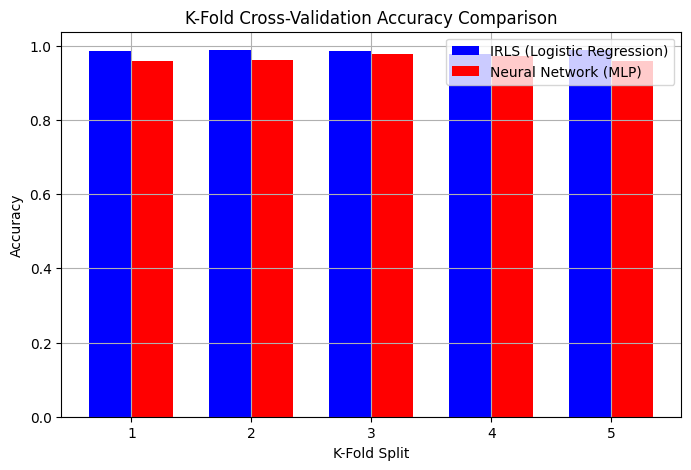

In [ ]:
plt.figure(figsize=(8, 5))
bar_width = 0.35
x_labels = np.arange(1, len(accuracy_scores) + 1)
plt.bar(x_labels - bar_width / 2, accuracy_scores, bar_width, label="IRLS (Logistic Regression)", color='blue')
plt.bar(x_labels + bar_width / 2, accuracy_scores_NN, bar_width, label="Neural Network (MLP)", color='red')


plt.xlabel("K-Fold Split")
plt.ylabel("Accuracy")
plt.title("K-Fold Cross-Validation Accuracy Comparison")
plt.legend()
plt.grid(True)
plt.show()

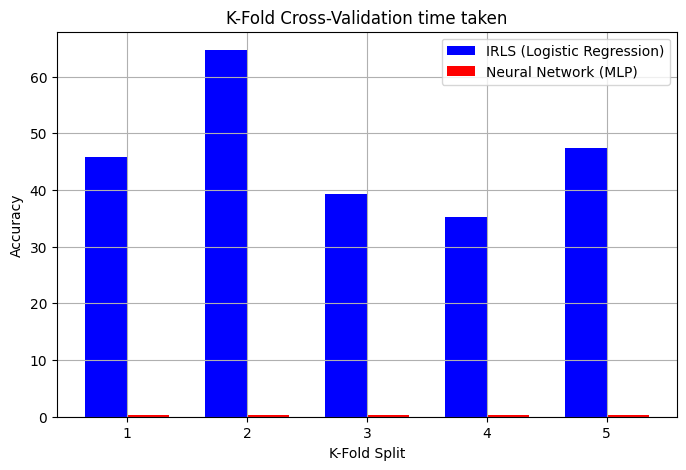

In [ ]:
plt.figure(figsize=(8, 5))
bar_width = 0.35
x_labels = np.arange(1, len(accuracy_scores) + 1)
plt.bar(x_labels - bar_width / 2, time_taken, bar_width, label="IRLS (Logistic Regression)", color='blue')
plt.bar(x_labels + bar_width / 2, time_taken_NN, bar_width, label="Neural Network (MLP)", color='red')

plt.xlabel("K-Fold Split")
plt.ylabel("Accuracy")
plt.title("K-Fold Cross-Validation time taken")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
np.argmax(IRLS_models[3])

np.int64(3)

In [ ]:
IRLS_models[3]

(24,)

In [ ]:
list(data)[3]

'FCVC'

In [ ]:
pytorch_total_params = sum(p.numel() for p in model.parameters())

In [ ]:
print(pytorch_total_params)

1345


In [ ]:
print()